In [ ]:
#datageneration

In [15]:
import numpy as np

# 1 Set random seed
np.random.seed(42)

# . Define parameters
n = 150
p = 150
k = 3
c_high = 0.9
c_low = 0.1
sigma = 0.5  # Adjust noise level as needed

# 3 Create base dataset X
X = np.random.randn(n, p)

# 4 Create coefficient vector beta
beta = np.zeros(p)
informative_indices = np.random.choice(p, k, replace=False)
beta[informative_indices] = [1, 5, 32]  
non_zero_coef = ~np.isin(np.arange(p), informative_indices)
beta[non_zero_coef] = np.random.uniform(0.1, 1, p - k)

# 5 Generate response vector y
y = X @ beta + sigma * np.random.randn(n)

# 6 Create high collinearity dataset
X_high_collinear = c_high * X[:, 0:1] + np.sqrt(1 - c_high**2) * np.random.randn(n, p)

# 7 Create low collinearity dataset
X_low_collinear = c_low * X[:, 0:1] + np.sqrt(1 - c_low**2) * np.random.randn(n, p)

import pandas as pd

# create DataFrames from NumPy arrays
df_X = pd.DataFrame(X)
df_X_high_collinear = pd.DataFrame(X_high_collinear)
df_X_low_collinear = pd.DataFrame(X_low_collinear)
df_y = pd.DataFrame(y)

# save DataFrames as CSV files
df_X.to_csv("X_dataset.csv", index=False)
df_X_high_collinear.to_csv("X_high_collinear_dataset.csv", index=False)
df_X_low_collinear.to_csv("X_low_collinear_dataset.csv", index=False)
df_y.to_csv("y_dataset.csv", index=False)

In [ ]:
#ridge 


Processing X_dataset.csv and y_dataset.csv...
Optimal lambda for X_dataset.csv: 0.44306214575838776
Optimal coefficients for X_dataset.csv: [ 2.14825562e-02  7.96396240e-03  1.08222547e-02 -7.10433445e-03
  1.82956422e-02  1.54624859e-02 -1.49138900e-03  2.34023372e-02
  1.64529091e-02  1.72464281e-02  7.89731303e-03  5.09370556e-03
  2.04821339e-02  1.99698591e-02  2.87557974e-02  2.54372061e-02
  1.49990939e-02  1.37753392e-01  1.80220149e-03  1.60509584e-02
  4.71033801e-02  9.78072517e-03  1.57653649e-02  8.66973974e-03
  5.29131411e-03  2.70933517e-02  1.60937224e-02  1.08976943e-02
  2.93645569e-03  1.12616781e-02  4.85255267e-03  2.74685423e-02
 -5.03707321e-04  2.16410114e-02  1.45442288e-02  1.67067188e-02
  3.03682523e-02  2.53195213e-02  9.38579062e-03 -6.69385182e-03
  1.23290455e-02  9.90363946e-03 -5.18738010e-03  1.14120135e-02
  8.67343747e-03 -1.77263846e-02  3.66783757e-03  1.80025577e-02
  2.56120214e-03  1.74198742e-03  3.59104716e-02  1.80145385e-02
  3.35595333e-

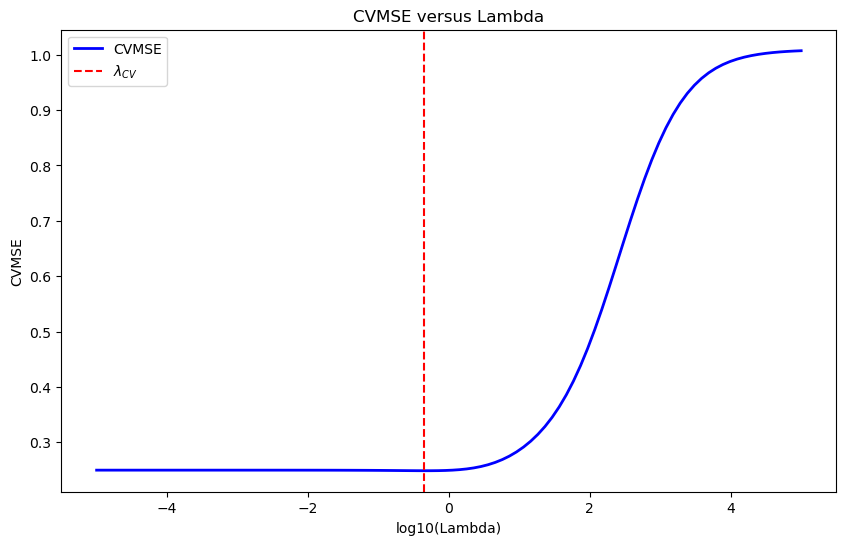

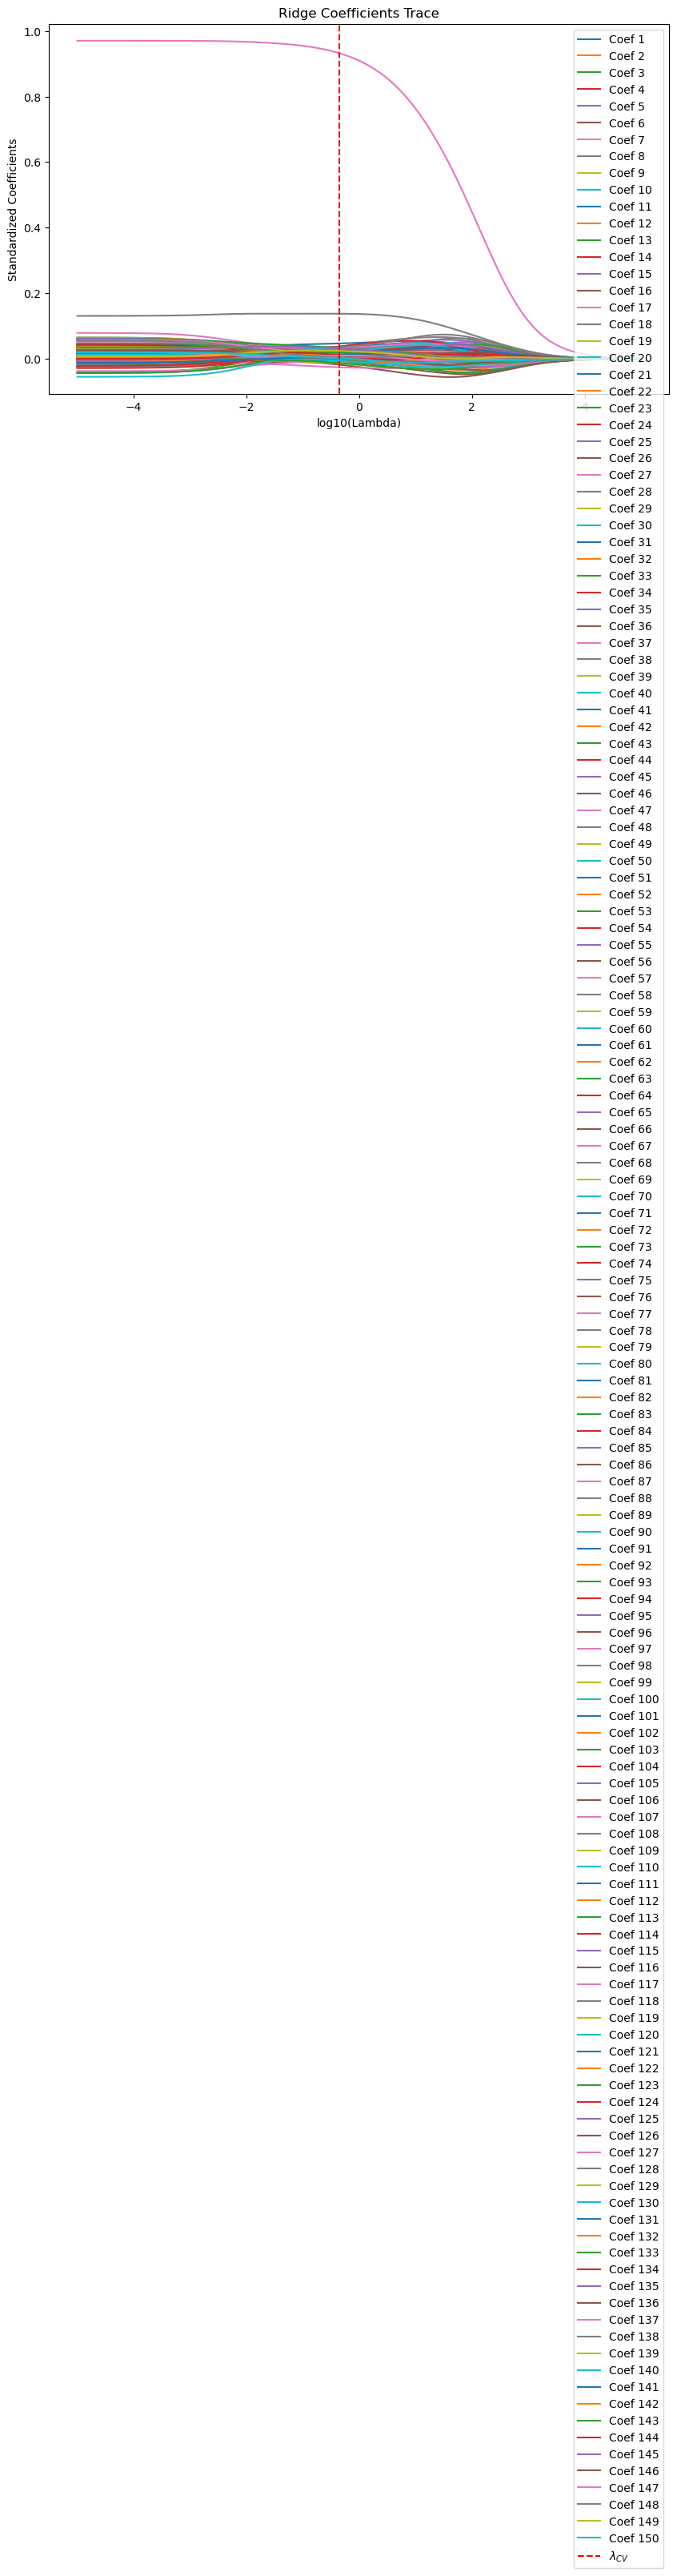


Processing X_high_collinear_dataset.csv and y_dataset.csv...
Optimal lambda for X_high_collinear_dataset.csv: 100000.0
Optimal coefficients for X_high_collinear_dataset.csv: [ 2.46482725e-05 -9.64515412e-05 -1.24313954e-04  5.26183234e-05
 -1.24685660e-04  1.64773630e-05 -1.17273571e-04 -5.92377111e-05
 -1.37701023e-05 -7.70653533e-05 -3.28876354e-05 -8.99403158e-05
 -1.26307957e-04 -7.21488778e-05 -9.46999092e-05 -1.21775837e-04
 -8.68571405e-05 -7.88427428e-05 -7.01213954e-05 -6.21205538e-05
 -3.81831959e-05 -9.14245590e-05 -1.02413745e-04 -4.27545729e-05
  6.83426770e-06 -6.29910819e-05 -8.27746088e-05 -4.99515313e-05
  1.63947435e-05 -3.14814304e-05 -1.37681402e-04 -7.27617205e-05
  1.62188492e-05 -1.01512015e-04 -8.87649151e-05  1.65405946e-06
 -5.40040478e-05 -1.06334681e-05  3.32421574e-05 -1.23704394e-04
 -9.98713719e-06 -4.14409975e-05 -6.40853727e-05 -8.57222417e-05
 -7.02124718e-05 -8.46307094e-05 -3.51230520e-05 -1.05361330e-04
  8.76178665e-05 -1.38997787e-04 -8.82916801e

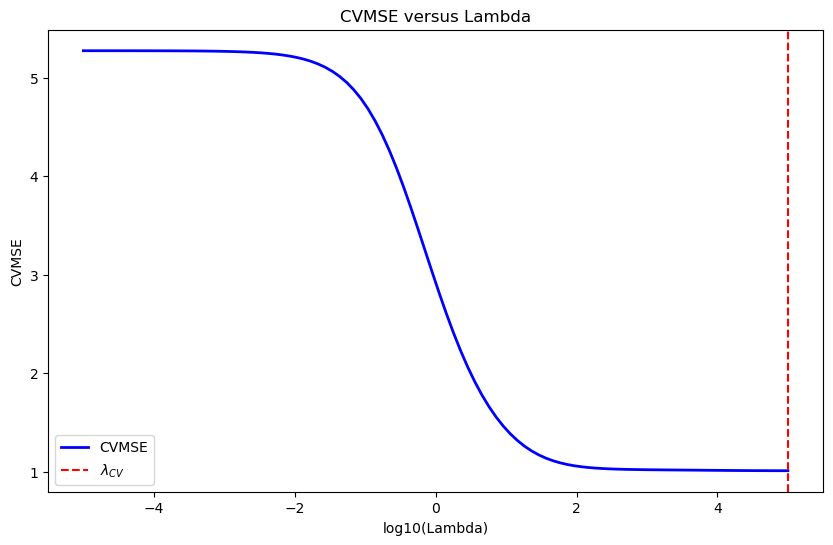

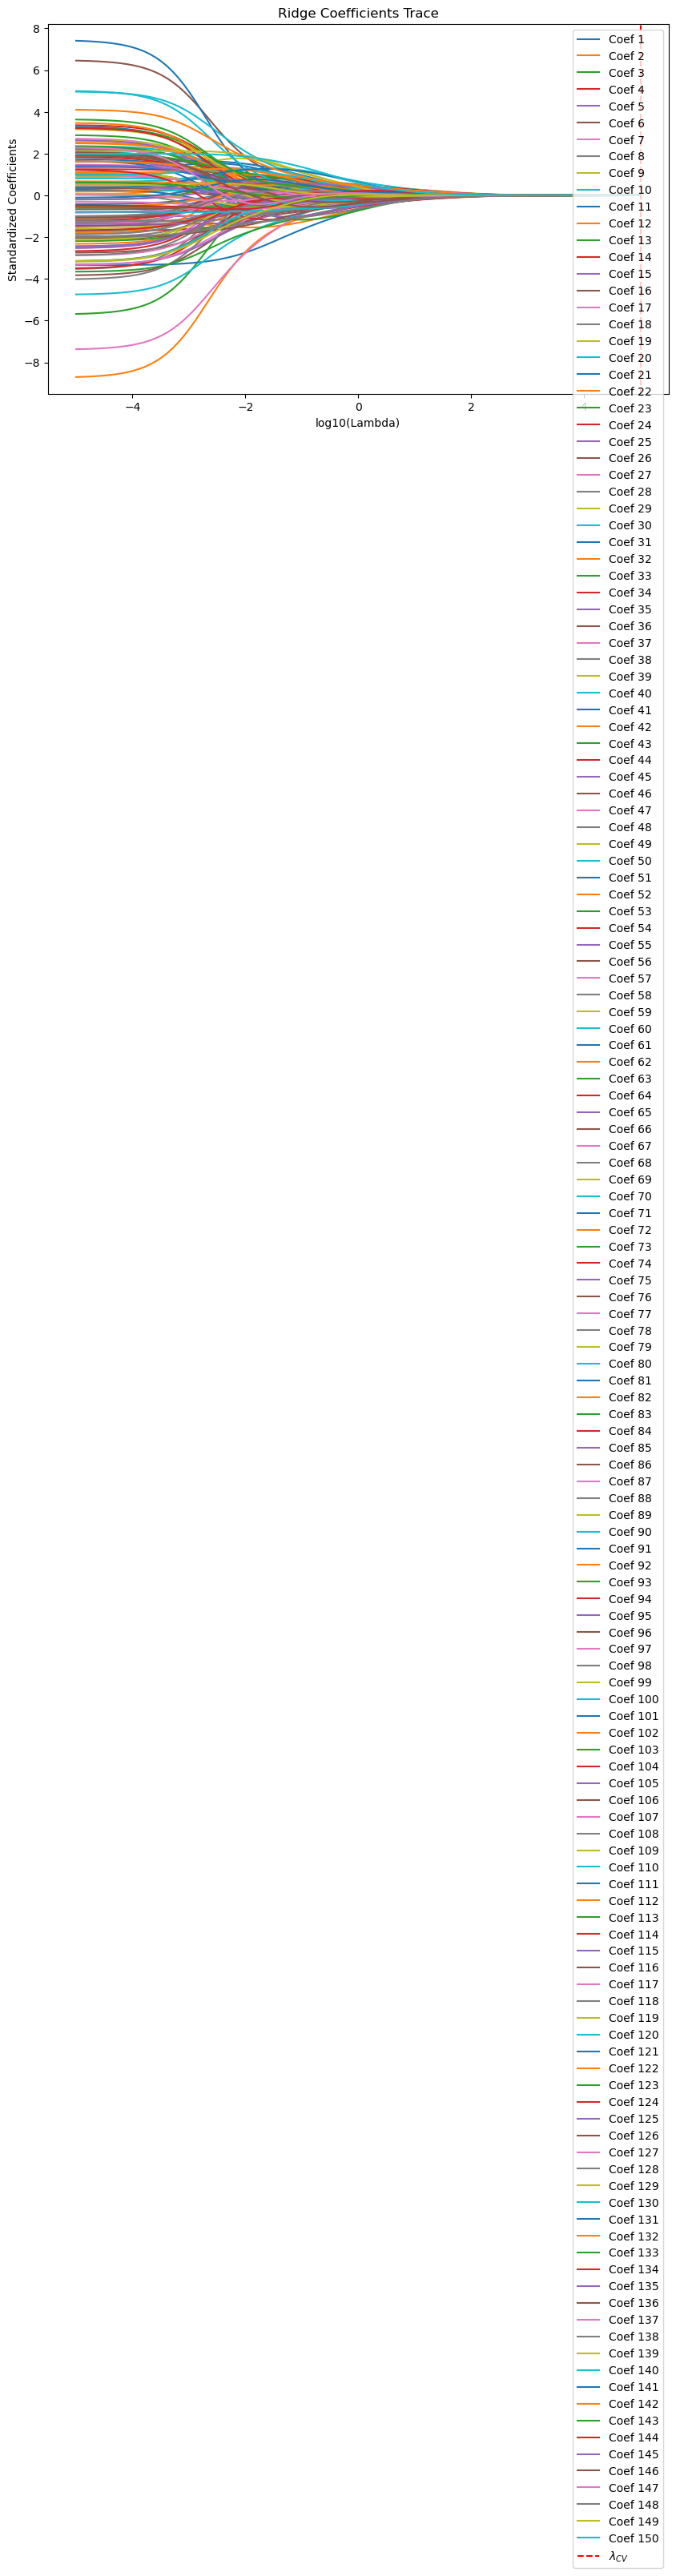


Processing X_low_collinear_dataset.csv and y_dataset.csv...
Optimal lambda for X_low_collinear_dataset.csv: 475.0810162102793
Optimal coefficients for X_low_collinear_dataset.csv: [ 0.00410293 -0.01641865 -0.00128316 -0.00148442 -0.00621682  0.04455598
  0.0076617  -0.01410372  0.02800658 -0.02264902  0.01964826  0.01317458
 -0.0168109  -0.00198958 -0.01620968 -0.02710677 -0.02191237  0.04298942
 -0.0019467   0.00091497  0.01259374 -0.04370862  0.01798576 -0.03270228
 -0.03444293  0.04471974 -0.02595688 -0.01011075 -0.00701098  0.00751963
 -0.00500977  0.00991454  0.00812426 -0.01361882  0.03582132  0.01294213
  0.01947576  0.00862673 -0.01047605 -0.00353008 -0.00492655  0.00499218
  0.01399748  0.00284979 -0.01002448  0.00530058 -0.01070434  0.00855838
  0.01246936 -0.01714195 -0.01068993 -0.01238792  0.01300184  0.00045742
 -0.01152276 -0.01756474  0.00268985 -0.01068466  0.00795946  0.01803365
  0.00250425  0.03526362  0.00536055  0.00185638 -0.02495475 -0.0043285
 -0.01601084  0.0

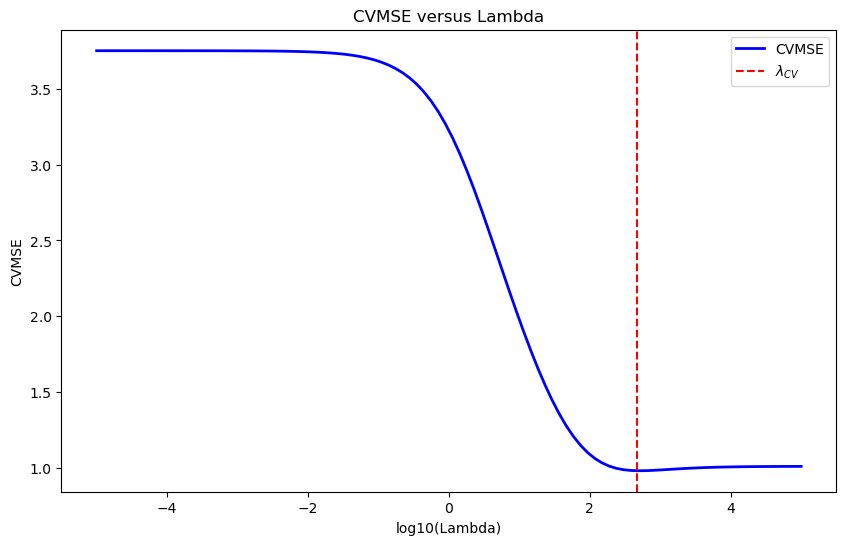

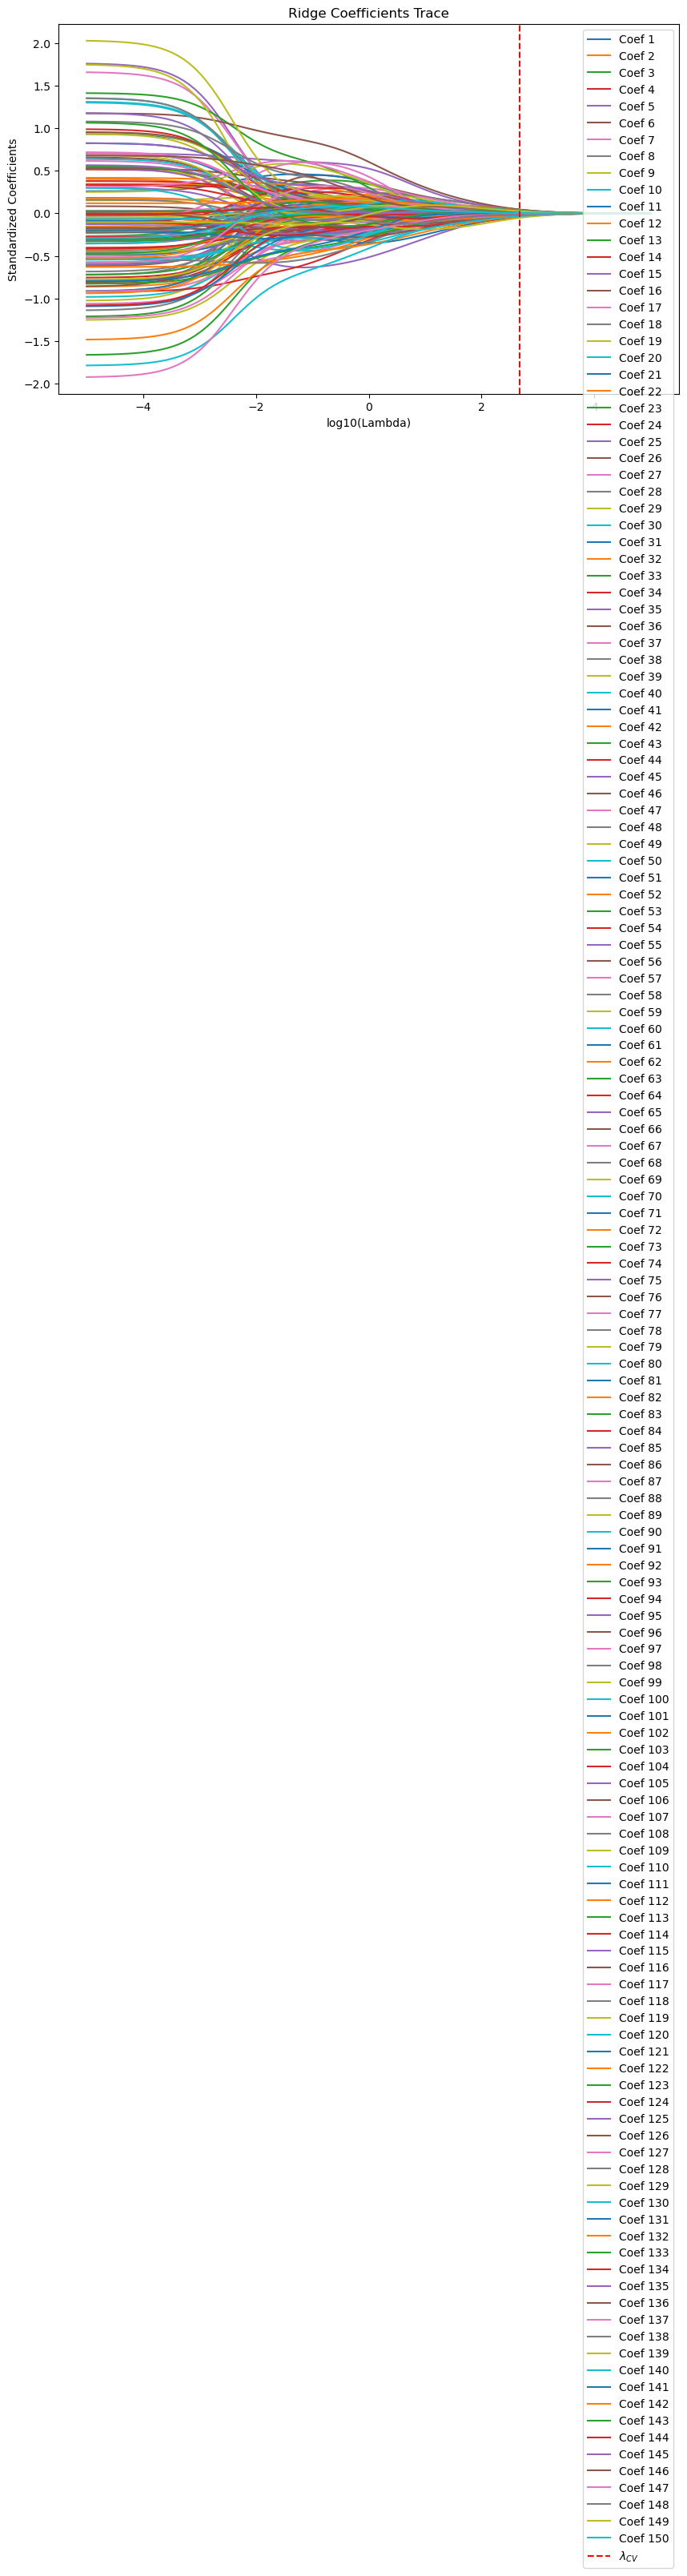

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler

def load_and_prepare_data(X_file_path, y_file_path):
    """Loads features (X) and response (y) data from CSV files, standardizes them, and returns."""
    X_data = pd.read_csv(X_file_path)
    y_data = pd.read_csv(y_file_path)

    # Standardize X and y separately
    scaler_X = StandardScaler()
    scaler_y = StandardScaler()
    X = scaler_X.fit_transform(X_data)
    y = scaler_y.fit_transform(y_data).ravel()  # Ravel to ensure y is a 1D array
    
    return X, y

def ridge_regression(X, y, X_file):
    """Performs Ridge regression with cross-validation to find the optimal lambda."""
    lambda_values = 10.0 ** np.linspace(-5, 5, 100)
    cv_mse = np.zeros_like(lambda_values)

    kf = KFold(n_splits=5, shuffle=True, random_state=1979)

    # Perform cross-validation
    for i, lambda_val in enumerate(lambda_values):
        model = Ridge(alpha=lambda_val)
        mse_scores = -cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=kf)
        cv_mse[i] = mse_scores.mean()

    # Find the lambda value that minimizes the CV MSE
    min_mse_index = np.argmin(cv_mse)
    optimal_lambda = lambda_values[min_mse_index]
    
    # Print the optimal lambda and its corresponding coefficients
    print(f"Optimal lambda for {X_file}: {optimal_lambda}")

    # Fit model with optimal lambda
    ridge_model = Ridge(alpha=optimal_lambda)
    ridge_model.fit(X, y)
    ridge_coefs = ridge_model.coef_

    print(f"Optimal coefficients for {X_file}: {ridge_coefs}")

    return optimal_lambda, cv_mse, ridge_coefs

def plot_results(lambda_values, cv_mse, optimal_lambda, coefs, X, y):  # Add X as an argument
    # Plot CVMSE versus log10(lambda)
    plt.figure(figsize=(10, 6))
    plt.plot(np.log10(lambda_values), cv_mse, label='CVMSE', color='blue', linewidth=2)
    plt.axvline(np.log10(optimal_lambda), color='red', linestyle='--', label=r'$\lambda_{CV}$')
    plt.xlabel('log10(Lambda)')
    plt.ylabel('CVMSE')
    plt.title('CVMSE versus Lambda')
    plt.legend()
    plt.show()

    # Plot coefficient values versus log10(lambda)
    coefs_trace = []
    for lambda_val in lambda_values:
        model = Ridge(alpha=lambda_val)
        model.fit(X, y)  # Now using the passed X and y
        coefs_trace.append(model.coef_)

    plt.figure(figsize=(10, 6))
    for i in range(X.shape[1]):
        plt.plot(np.log10(lambda_values), [coef[i] for coef in coefs_trace], label=f'Coef {i+1}')

    plt.axvline(np.log10(optimal_lambda), color='red', linestyle='--', label=r'$\lambda_{CV}$')
    plt.xlabel('log10(Lambda)')
    plt.ylabel('Standardized Coefficients')
    plt.title('Ridge Coefficients Trace')
    plt.legend(loc='upper right')
    plt.show()

# file paths for the datasets (separate files for X and y)
datasets = [
    ("X_dataset.csv", "y_dataset.csv"),
    ("X_high_collinear_dataset.csv", "y_dataset.csv"),
    ("X_low_collinear_dataset.csv", "y_dataset.csv"),
]

# Main Execution Loop
for X_file, y_file in datasets:
    print(f"\nProcessing {X_file} and {y_file}...")
    X, y = load_and_prepare_data(X_file, y_file)  
    optimal_lambda, cv_mse, ridge_coefs = ridge_regression(X, y, X_file)
    plot_results(10.0 ** np.linspace(-5, 5, 100), cv_mse, optimal_lambda, ridge_coefs, X, y) # Pass X and y to plot_results



In [ ]:
#lasso


Processing dataset: X_dataset.csv and y_dataset.csv
  Optimal lambda: 0.0019
  Optimal coefficients (beta_hat): [ 1.19809059e-02 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.84230975e-02  3.11525578e-02  1.13095599e-02  2.47500018e-02
  0.00000000e+00  1.00785762e-02  0.00000000e+00  1.43660958e-03
  2.94186525e-02  0.00000000e+00  2.36207244e-02  2.23981570e-03
  8.43917056e-03  1.23860099e-01  0.00000000e+00  5.21985434e-03
  2.87535808e-02  2.91127384e-03  1.03589661e-02 -0.00000000e+00
  2.56048429e-02  1.41368399e-02  6.69236547e-03  1.82657728e-02
 -1.23620767e-04  2.11358398e-02  1.03557486e-02  1.23070487e-02
  0.00000000e+00  6.27148558e-03  1.10495379e-02  2.37524237e-02
  1.84273272e-02  1.96809909e-02  4.77636936e-03 -0.00000000e+00
  7.29060689e-03  1.13010943e-02 -0.00000000e+00  6.66936322e-03
  0.00000000e+00  0.00000000e+00  1.05407468e-02 -0.00000000e+00
  2.55978919e-03  2.05124132e-02  6.91608637e-03  7.18894036e-03
  1.49358098e-02  6.10738452e-05  0.000000

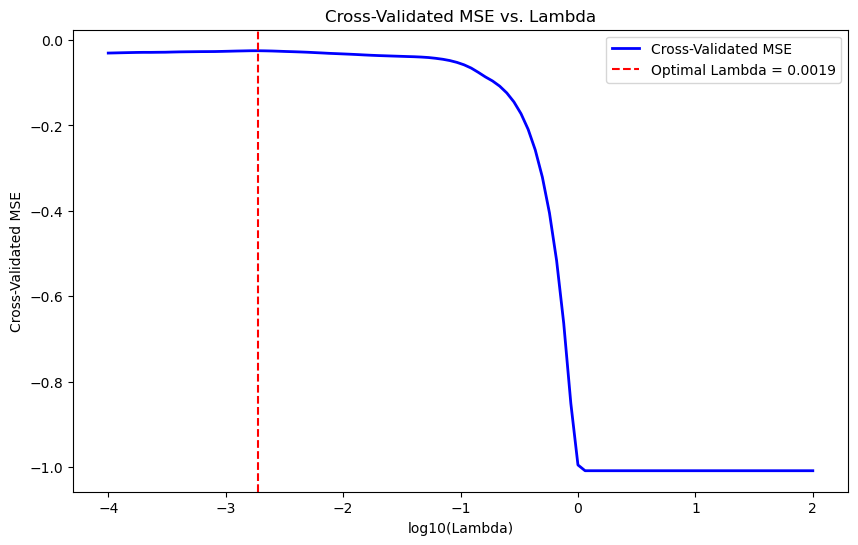

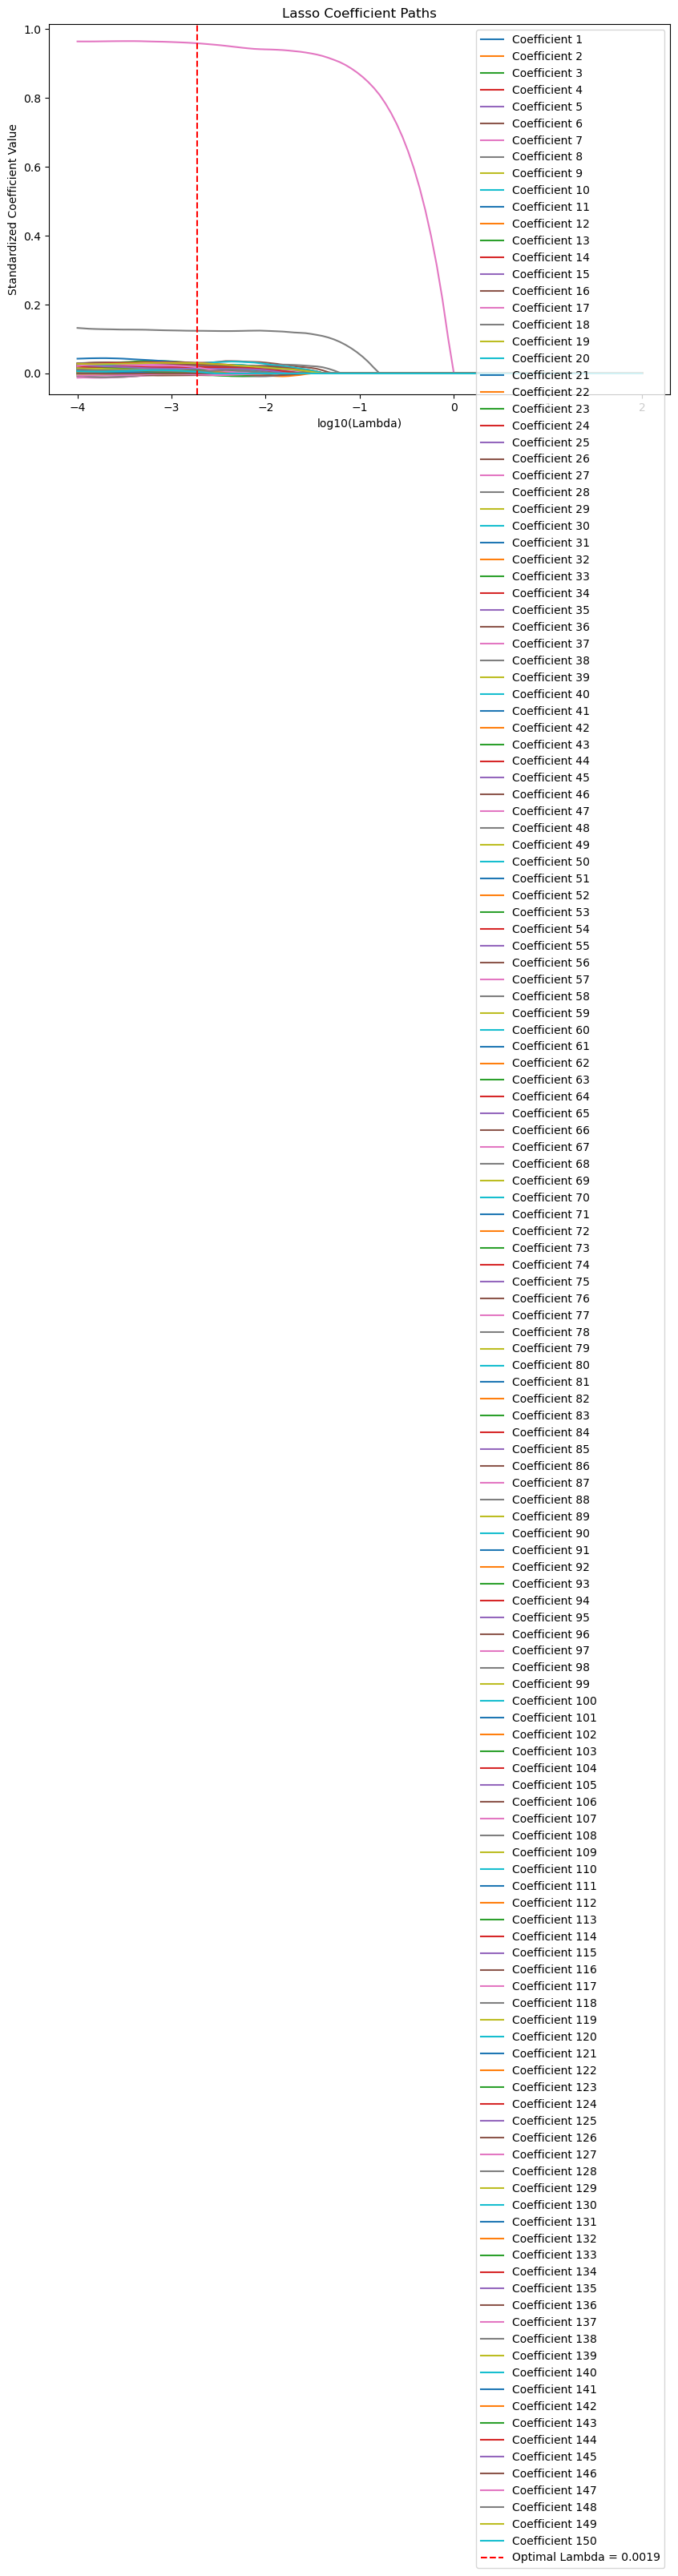


Processing dataset: X_high_collinear_dataset.csv and y_dataset.csv


C:\Users\osama\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.148e-01, tolerance: 1.210e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\osama\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.285e-01, tolerance: 1.186e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\osama\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.802e-01, toleranc

C:\Users\osama\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.573e-01, tolerance: 1.067e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\osama\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.059e+00, tolerance: 1.259e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\osama\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.092e+00, toleranc

C:\Users\osama\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.545e+00, tolerance: 1.186e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\osama\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.413e+00, tolerance: 1.067e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\osama\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.635e+00, toleranc

C:\Users\osama\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.886e+00, tolerance: 1.186e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\osama\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.718e+00, tolerance: 1.067e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\osama\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.924e+00, toleranc

C:\Users\osama\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.678e+00, tolerance: 1.067e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\osama\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.937e+00, tolerance: 1.259e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\osama\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.287e+00, toleranc

C:\Users\osama\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.088e+00, tolerance: 1.210e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\osama\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.432e+00, tolerance: 1.186e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\osama\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.608e+00, toleranc

C:\Users\osama\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.959e+00, tolerance: 1.272e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\osama\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.026e-01, tolerance: 1.210e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\osama\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.326e+00, toleranc

C:\Users\osama\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.922e-01, tolerance: 1.259e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\osama\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.105e-01, tolerance: 1.272e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\osama\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.740e-01, toleranc

  Optimal lambda: 0.2154
  Optimal coefficients (beta_hat): [ 0. -0. -0.  0. -0.  0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0. -0. -0. -0.  0. -0. -0. -0.
 -0. -0.  0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0. -0. -0. -0. -0. -0.
  0. -0.  0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0. -0. -0. -0. -0.
 -0. -0.  0. -0. -0. -0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0.]


C:\Users\osama\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.946e+00, tolerance: 1.500e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\osama\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.064e+00, tolerance: 1.500e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\osama\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.193e+00, toleranc

C:\Users\osama\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.629e+00, tolerance: 1.500e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\osama\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.377e+00, tolerance: 1.500e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\osama\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.068e+00, toleranc

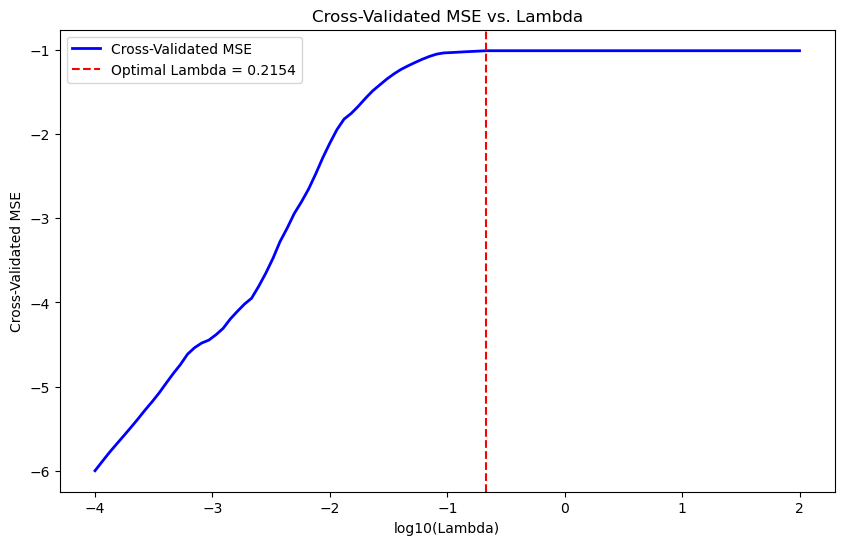

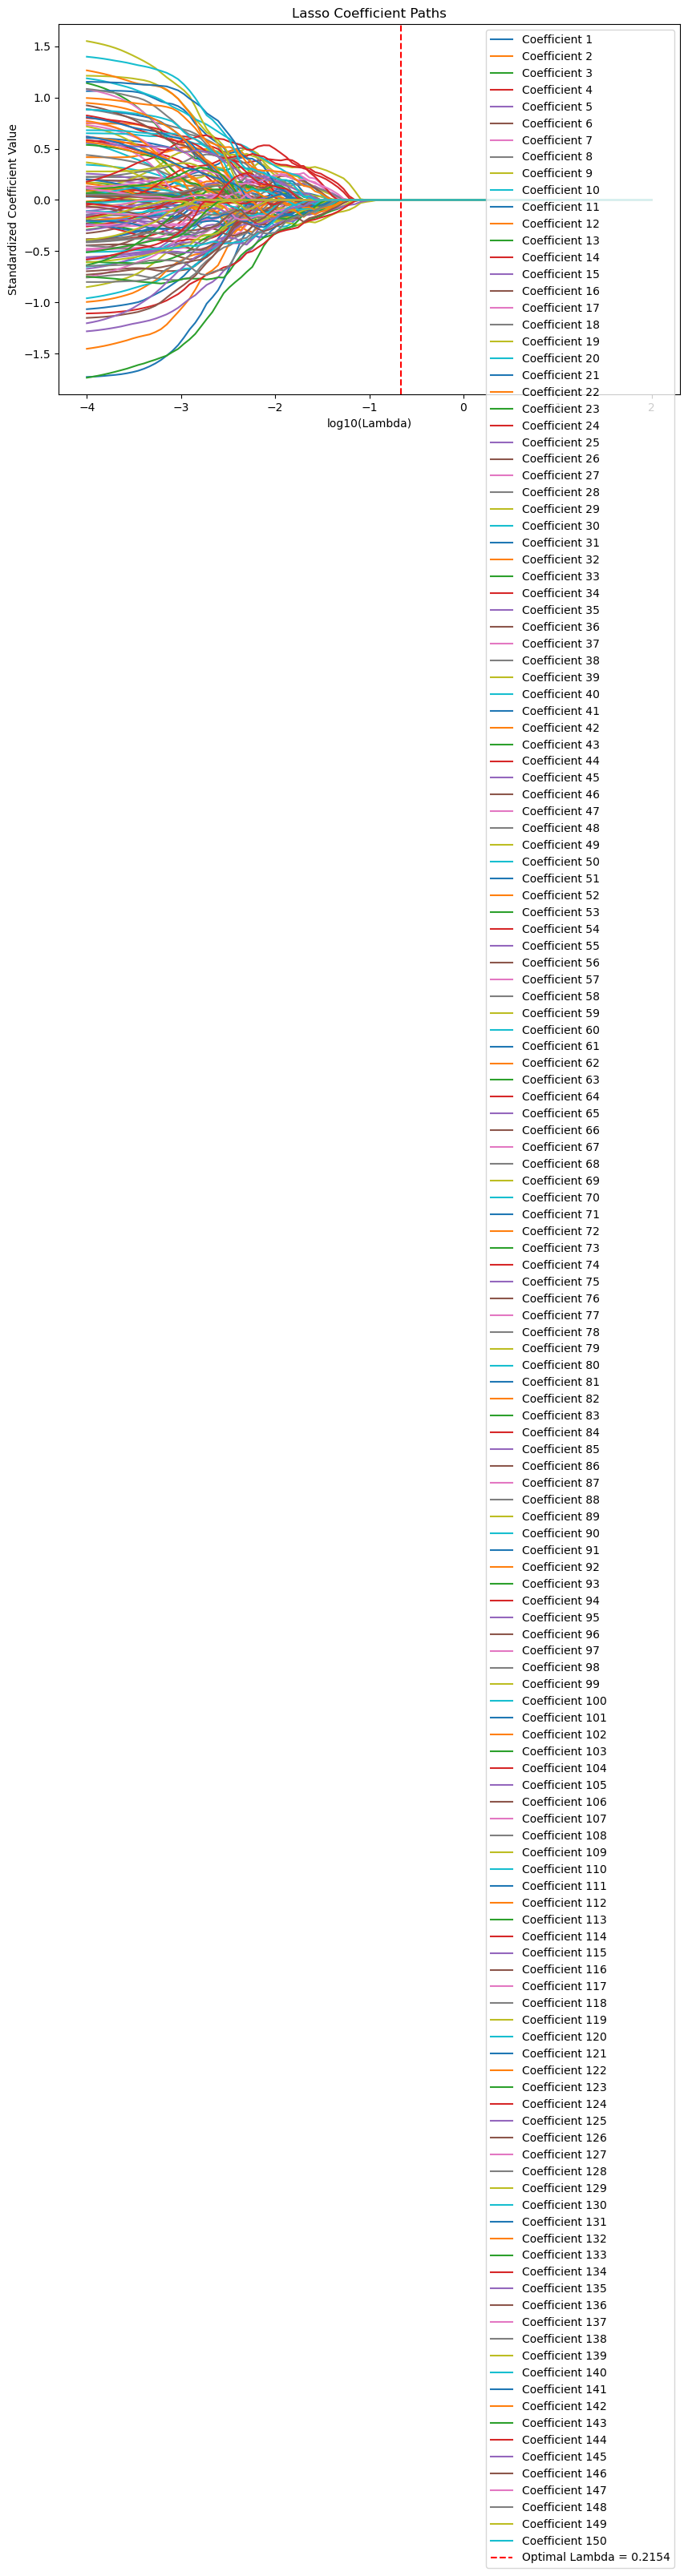


Processing dataset: X_low_collinear_dataset.csv and y_dataset.csv


C:\Users\osama\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.066e-02, tolerance: 1.210e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\osama\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.806e-02, tolerance: 1.186e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\osama\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.841e-02, toleranc

C:\Users\osama\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.217e-02, tolerance: 1.186e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\osama\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.364e-01, tolerance: 1.067e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\osama\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.615e-02, toleranc

C:\Users\osama\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.890e-02, tolerance: 1.272e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\osama\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.058e-02, tolerance: 1.210e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\osama\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.697e-02, toleranc

C:\Users\osama\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.029e-02, tolerance: 1.210e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\osama\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.336e-02, tolerance: 1.186e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\osama\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.535e-02, toleranc

  Optimal lambda: 0.1072
  Optimal coefficients (beta_hat): [ 0.         -0.          0.         -0.         -0.          0.10791987
  0.         -0.          0.         -0.00094667  0.          0.
 -0.         -0.         -0.         -0.00861811 -0.          0.07747201
 -0.         -0.          0.         -0.07321168  0.         -0.05263206
 -0.02721859  0.06070051 -0.         -0.         -0.          0.
 -0.          0.          0.         -0.          0.04360364  0.
  0.          0.         -0.         -0.         -0.          0.
  0.          0.         -0.          0.         -0.          0.
  0.         -0.         -0.         -0.          0.         -0.
 -0.         -0.          0.         -0.          0.          0.
  0.          0.03316619  0.          0.         -0.00081577 -0.
 -0.          0.          0.         -0.07508636  0.          0.
 -0.          0.         -0.         -0.05723816 -0.01666172  0.
  0.          0.          0.          0.          0.         -0.
 -0.  

C:\Users\osama\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.347e-01, tolerance: 1.500e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\osama\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.486e-01, tolerance: 1.500e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\osama\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.304e-01, toleranc

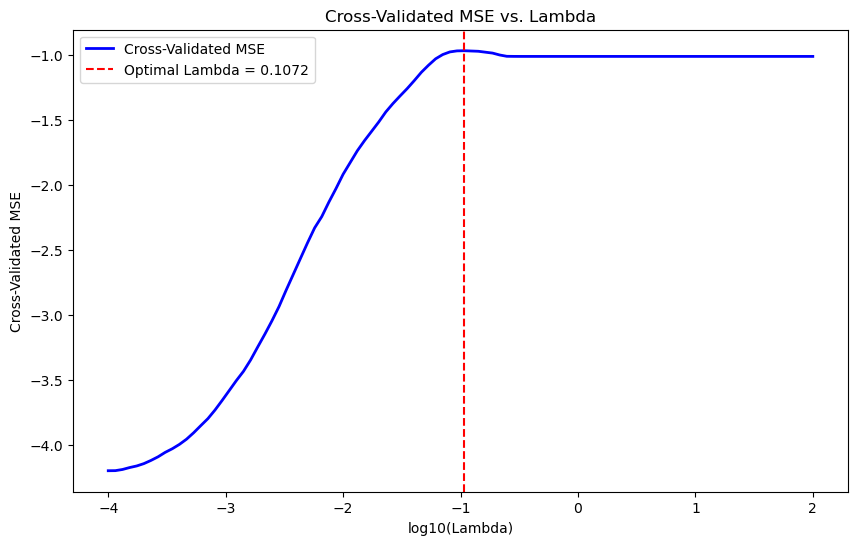

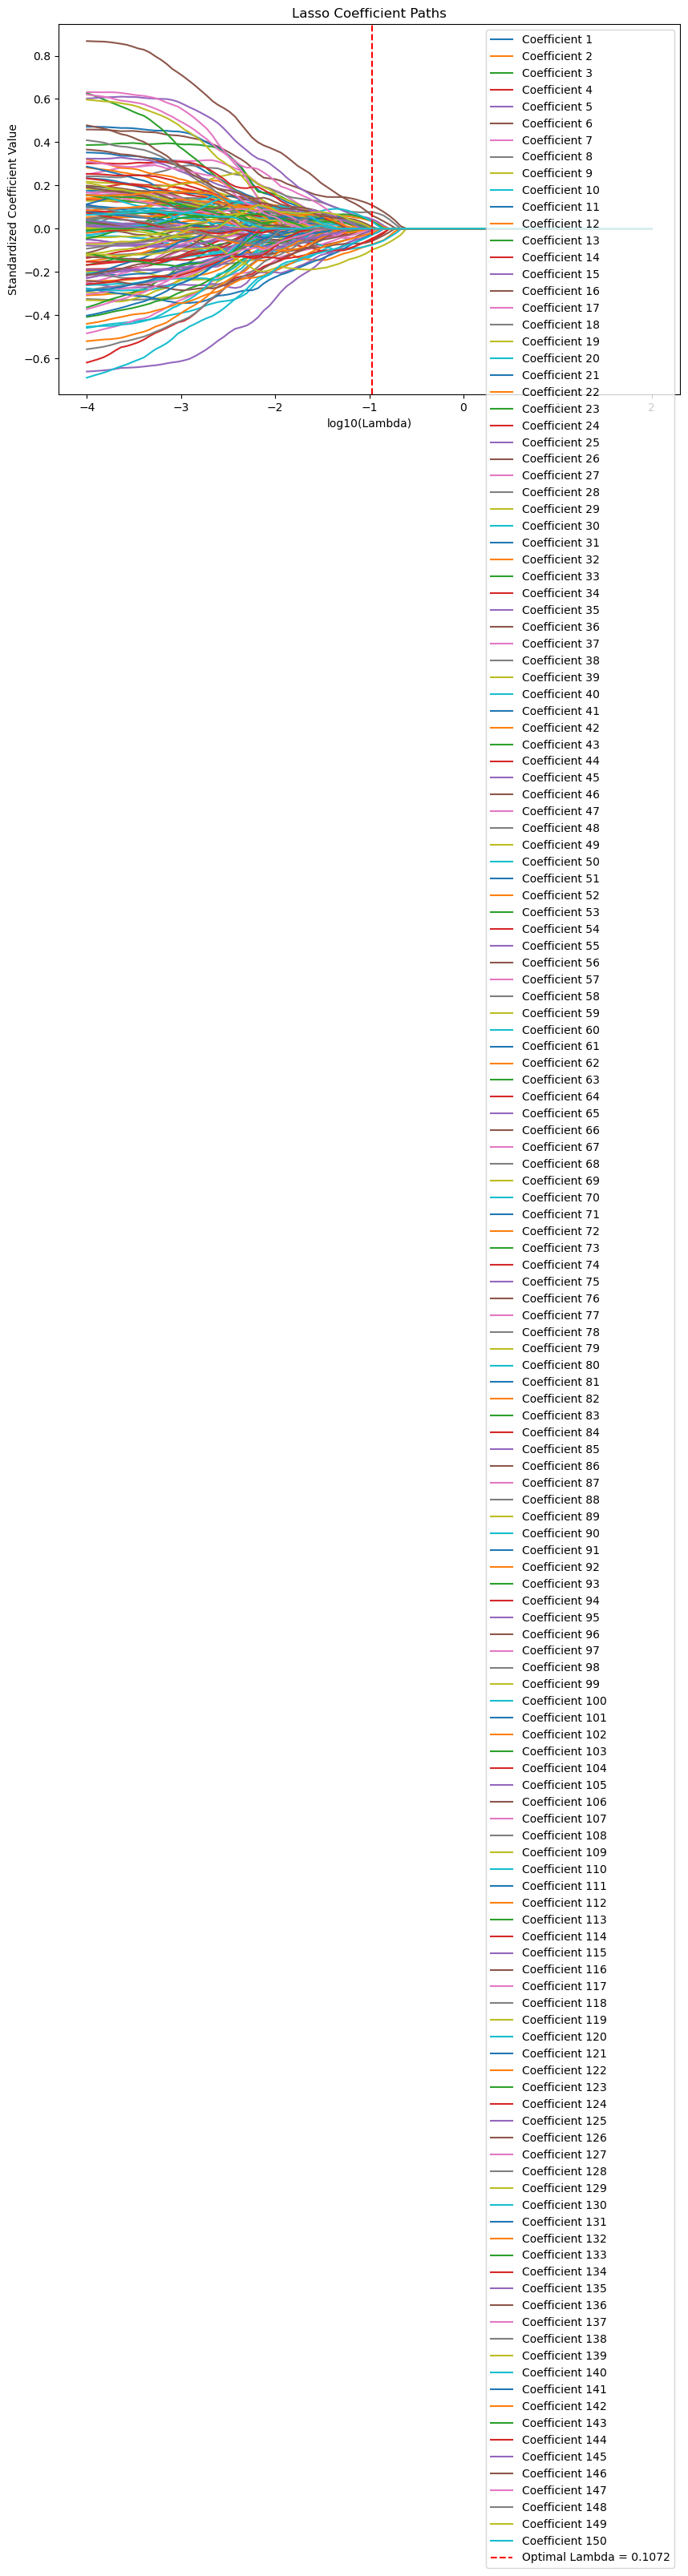

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

# 1. Data Loading and Preparation

def load_and_prepare_data(X_file_path, y_file_path):
    """Loads features (X) and response (y) data from CSV files, standardizes them, and returns."""
    X_data = pd.read_csv(X_file_path)
    y_data = pd.read_csv(y_file_path)

    scaler_X = StandardScaler()
    scaler_y = StandardScaler()
    X = scaler_X.fit_transform(X_data)
    y = scaler_y.fit_transform(y_data).ravel()

    return X, y

# 2. Lasso Coordinate Descent Function

def lasso_coordinate_descent(X, y, lambda_reg):
    """Performs Lasso regression using coordinate descent."""
    n, p = X.shape
    beta = np.zeros(p)
    max_iter = 1000
    tol = 1e-4

    for _ in range(max_iter):
        beta_old = beta.copy()
        for j in range(p):
            idx = list(range(j)) + list(range(j + 1, p))
            r = y - X[:, idx] @ beta[idx]
            ro = X[:, j] @ r
            if ro < -lambda_reg:
                beta[j] = (ro + lambda_reg) / (X[:, j] ** 2).sum()
            elif ro > lambda_reg:
                beta[j] = (ro - lambda_reg) / (X[:, j] ** 2).sum()
            else:
                beta[j] = 0
        if np.linalg.norm(beta - beta_old, 2) < tol:
            break
    return beta

# 3. Cross-Validation with Grid Search

def cross_validate_lasso(X, y):
    """Performs 5-fold cross-validation for Lasso with a grid search for lambda."""
    alpha_values = np.logspace(-4, 2, 100)  # Wide range of lambda values
    model = Lasso()
    grid = GridSearchCV(model, param_grid={'alpha': alpha_values}, scoring='neg_mean_squared_error', cv=5)
    grid.fit(X, y)
    return grid.best_params_['alpha'], grid.cv_results_['mean_test_score']  # Return optimal lambda and all MSE scores

# 4. Plotting Functions

def plot_results(lambda_values, cv_mse, optimal_lambda, coefs):
    """Plots CVMSE vs. lambda and Lasso coefficient paths."""

    plt.figure(figsize=(10, 6))
    plt.plot(np.log10(lambda_values), cv_mse, label='Cross-Validated MSE', color='blue', linewidth=2)
    plt.axvline(np.log10(optimal_lambda), color='red', linestyle='--', label=f'Optimal Lambda = {optimal_lambda:.4f}')
    plt.xlabel('log10(Lambda)')
    plt.ylabel('Cross-Validated MSE')
    plt.title('Cross-Validated MSE vs. Lambda')
    plt.legend()
    plt.show()

    plt.figure(figsize=(10, 6))
    for i in range(coefs.shape[1]):
        plt.plot(np.log10(lambda_values), coefs[:, i], label=f'Coefficient {i+1}')
    plt.axvline(np.log10(optimal_lambda), color='red', linestyle='--', label=f'Optimal Lambda = {optimal_lambda:.4f}')
    plt.xlabel('log10(Lambda)')
    plt.ylabel('Standardized Coefficient Value')
    plt.title('Lasso Coefficient Paths')
    plt.legend()
    plt.show()


# 5. File Paths and Dataset Processing

datasets = [
    ("X_dataset.csv", "y_dataset.csv"),
    ("X_high_collinear_dataset.csv","y_dataset.csv"),
    ("X_low_collinear_dataset.csv", "y_dataset.csv"),
]

for X_file, y_file in datasets:
    print(f"\nProcessing dataset: {X_file} and {y_file}")
    X, y = load_and_prepare_data(X_file, y_file)

    # Cross-validation to find optimal lambda
    optimal_lambda, all_mse = cross_validate_lasso(X, y)
    print(f"  Optimal lambda: {optimal_lambda:.4f}")

    # Fit the Lasso model with the optimal lambda
    model = Lasso(alpha=optimal_lambda)
    model.fit(X, y)

    # Get and print the optimal coefficients (beta_hat)
    coefs = model.coef_
    print(f"  Optimal coefficients (beta_hat): {coefs}") 

    # --- Calculate coefficient paths for plotting ---
    lambda_values = np.logspace(-4, 2, 100)
    coef_path = []
    for lambda_val in lambda_values:
        model = Lasso(alpha=lambda_val)
        model.fit(X, y)
        coef_path.append(model.coef_)
    coef_path = np.array(coef_path)

    # Plot results (CVMSE vs. lambda and coefficient paths)
    plot_results(lambda_values, all_mse, optimal_lambda, coef_path)


In [ ]:
#pca


Processing X_dataset.csv and y_dataset.csv


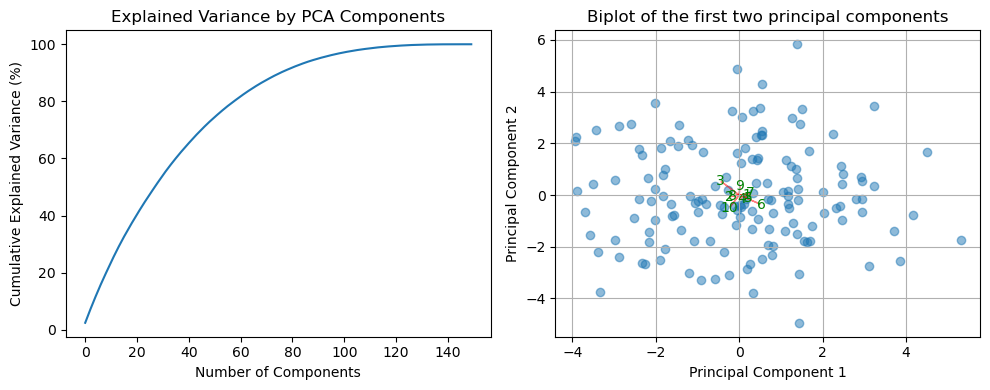

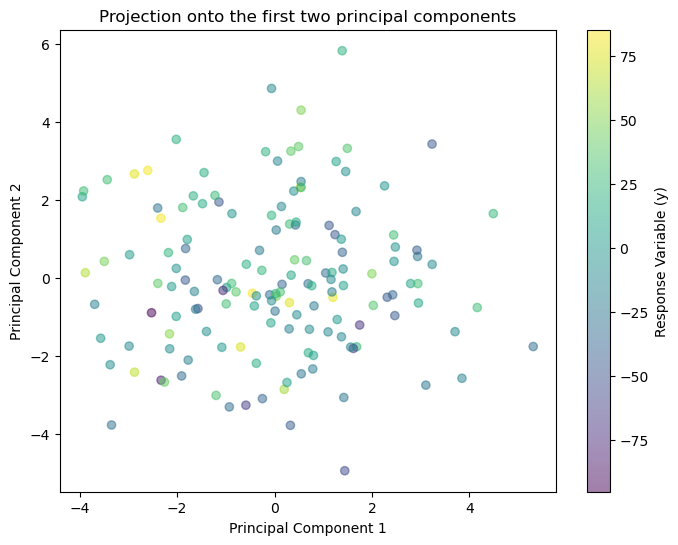


Processing X_high_collinear_dataset.csv and y_dataset.csv


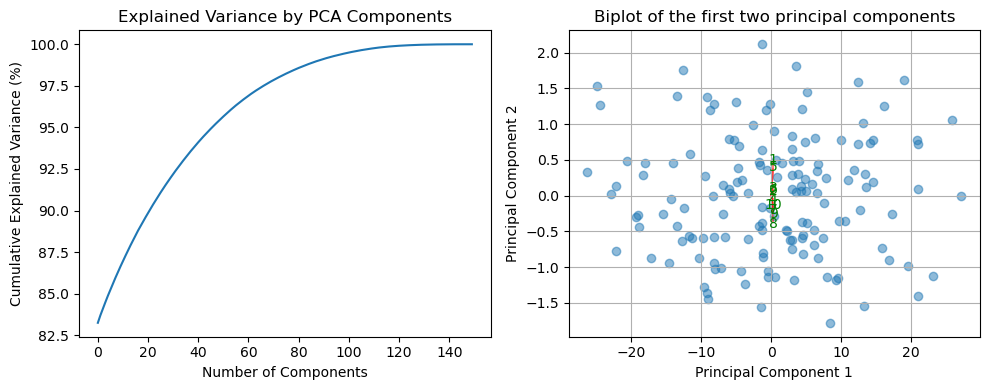

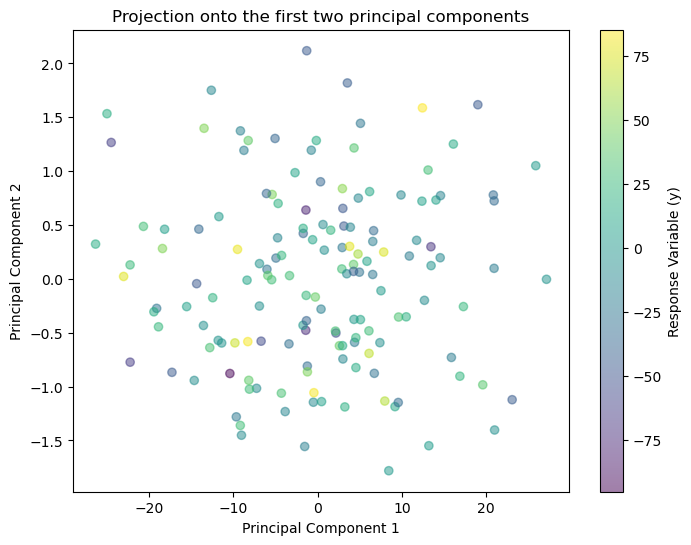


Processing X_low_collinear_dataset.csv and y_dataset.csv


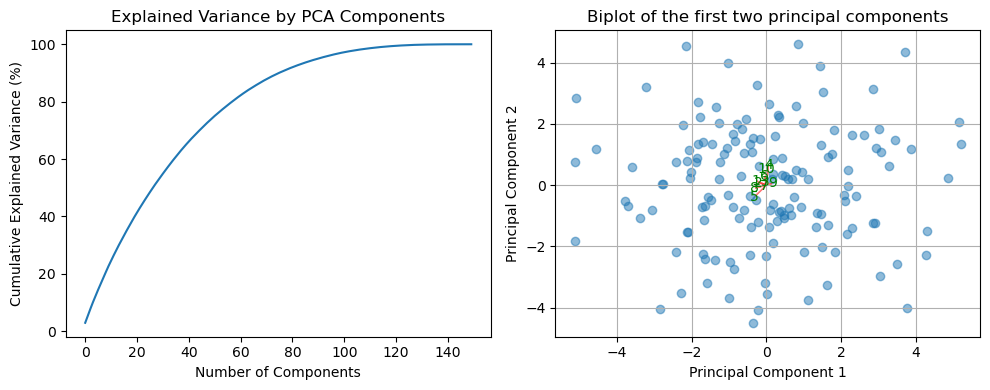

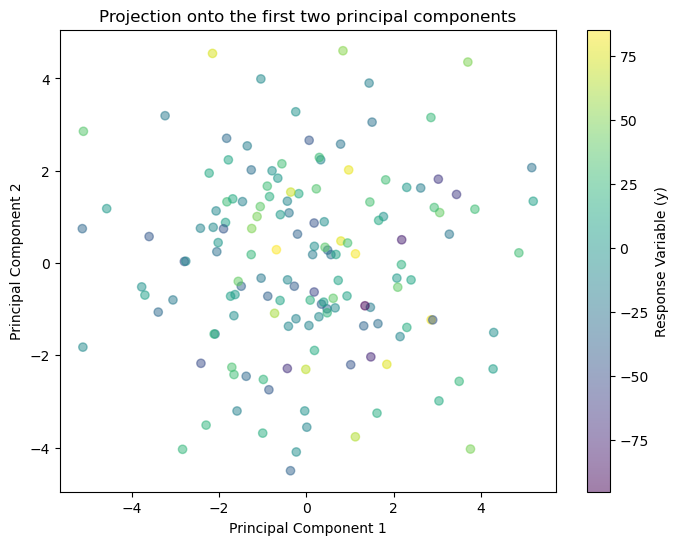

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# File paths for the datasets (assuming separate files for X and y)
datasets = [
    ("X_dataset.csv", "y_dataset.csv"),
    ("X_high_collinear_dataset.csv", "y_dataset.csv"),
    ("X_low_collinear_dataset.csv", "y_dataset.csv"),
]

# Function to load and prepare data 
def load_and_prepare_data(X_file_path, y_file_path):
    """Loads features (X) and response (y) data from CSV files, standardizes X, and returns."""
    X_data = pd.read_csv(X_file_path)
    y_data = pd.read_csv(y_file_path).values.ravel()  # Load and ravel y

    scaler = StandardScaler()
    X = scaler.fit_transform(X_data)  # Standardize X
    
    return X, y_data  # Return scaled X and unscaled y (for plotting)

# Function to perform PCA
def perform_pca(X):
    """Performs PCA and returns the PCA object and explained variance."""
    pca = PCA()
    pca.fit(X)
    explained_variance = pca.explained_variance_ratio_ * 100
    return pca, explained_variance

# Function to plot PCA results
def plot_pca_results(pca, explained_variance, X, y):
    """Plots PCA results: explained variance, biplot, and projection."""
    plt.figure(figsize=(10, 4))

    # Plot explained variance
    plt.subplot(1, 2, 1)
    plt.plot(np.cumsum(explained_variance))
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance (%)')
    plt.title('Explained Variance by PCA Components')

    # Plot biplot
    plt.subplot(1, 2, 2)
    scores = pca.transform(X)
    plt.scatter(scores[:, 0], scores[:, 1], alpha=0.5)
    
    # Adjusted to find and plot the maximum number of features
    n_features_to_display = min(X.shape[1], 10)  # Adjust as needed
    for i in range(n_features_to_display):
        plt.arrow(0, 0, pca.components_[0, i]*3, pca.components_[1, i]*3, 
                  color='r', alpha=0.5)
        plt.text(pca.components_[0, i]*3.2, pca.components_[1, i]*3.2, str(i+1), 
                 color='g', ha='center', va='center')
    
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Biplot of the first two principal components')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    # Plot projection with colors based on y
    plt.figure(figsize=(8, 6))
    plt.scatter(scores[:, 0], scores[:, 1], c=y, alpha=0.5, cmap='viridis')
    plt.colorbar(label='Response Variable (y)')  # Add colorbar
    plt.title('Projection onto the first two principal components')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()
 
# Main Execution Loop
for X_file, y_file in datasets:
    print(f"\nProcessing {X_file} and {y_file}")
    X, y = load_and_prepare_data(X_file, y_file)
    pca, explained_variance = perform_pca(X)
    plot_pca_results(pca, explained_variance, X, y)


In [ ]:
#monte carlo

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from joblib import Parallel, delayed

# File paths for the datasets (assuming separate files for X and y)
datasets = [
    ("X_dataset.csv", "y_dataset.csv"),
    ("X_high_collinear_dataset.csv", "y_dataset.csv"),
    ("X_low_collinear_dataset.csv", "y_dataset.csv"),
]

def load_and_prepare_data(X_file_path, y_file_path):
    """Loads features (X) and response (y) data from CSV files, standardizes them, and returns."""
    X_data = pd.read_csv(X_file_path)
    y_data = pd.read_csv(y_file_path)

    scaler_X = StandardScaler()
    scaler_y = StandardScaler()

    X = scaler_X.fit_transform(X_data)
    y = scaler_y.fit_transform(y_data.values.reshape(-1, 1)).ravel()

    return X, y

def evaluate_model(X_train, y_train, X_val, y_val, degree):
    """Evaluates a polynomial regression model of a given degree on validation data."""
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())  # Removed interaction_only=True
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    return mean_squared_error(y_val, y_pred)

def find_best_degree(X_train, y_train, X_val, y_val, max_degree):
    """Finds the best degree for a polynomial model using cross-validation."""
    best_degree, best_score = 1, float('inf')
    for degree in range(1, max_degree + 1):
        score = evaluate_model(X_train, y_train, X_val, y_val, degree)
        if score < best_score:
            best_degree, best_score = degree, score
    return best_degree

def monte_carlo_single_run(X, y, sample_size, max_degree):
    """Performs a single Monte Carlo simulation run."""
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=np.random.randint(1, 1000))

    indices = np.random.choice(len(y_train), sample_size, replace=True)
    X_sample = X_train[indices]
    y_sample = y_train[indices]

    best_degree = find_best_degree(X_sample, y_sample, X_val, y_val, max_degree)
    return best_degree

def monte_carlo_simulation_parallel(X_file, y_file, sample_sizes, n_monte_carlo, max_degree, n_jobs=-1):
    """Performs Monte Carlo simulation for different sample sizes in parallel."""
    X, y = load_and_prepare_data(X_file, y_file)
    results = {}

    for sample_size in sample_sizes:
        selected_degrees = Parallel(n_jobs=n_jobs)(
            delayed(monte_carlo_single_run)(X, y, sample_size, max_degree) for _ in range(n_monte_carlo)
        )
        results[sample_size] = selected_degrees

        mean_degree = np.mean(selected_degrees)
        std_dev_degree = np.std(selected_degrees)
        print(
            f"Dataset: {X_file}, Sample size: {sample_size}, Mean degree: {mean_degree:.2f}, Std dev: {std_dev_degree:.2f}"
        )

    return results

# Parameters for the simulation
sample_sizes = [30, 100, 150]
n_monte_carlo = 50
max_degree = 3
n_jobs = -1  # Use all available CPU cores

# Main Execution Loop
all_results = {}
for X_file, y_file in datasets:
    print(f"\n----- Starting simulation for {X_file} and {y_file} -----")
    results = monte_carlo_simulation_parallel(X_file, y_file, sample_sizes, n_monte_carlo, max_degree, n_jobs)
    all_results[(X_file, y_file)] = results

# Analyzing and Visualizing the Results
for (X_file, y_file), results in all_results.items():
    for sample_size, degrees in results.items():
        plt.hist(degrees, bins=np.arange(1, max_degree+2)-0.5, edgecolor='black')
        plt.title(f'Histogram of Best Degrees\nDataset: {X_file}, Sample Size: {sample_size}')
        plt.xlabel('Degree')
        plt.ylabel('Frequency')
        plt.xticks(np.arange(1, max_degree+1))
        plt.show()


----- Starting simulation for X_dataset.csv and y_dataset.csv -----
Dataset: X_dataset.csv, Sample size: 30, Mean degree: 1.34, Std dev: 0.67
Dataset: X_dataset.csv, Sample size: 100, Mean degree: 1.00, Std dev: 0.00
